### Histogram Analysis
Here we make a comparison of the histograms - probabilities distribution - of the trapped particle, both with and without external perturbations.

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# From the data of the simulation, the only thing that is essential for the MBR is the total time, as it can be mapped with respect of the frame number
tot_time = 30
# Select the time where which samples will start to be taken
t_i = 15

# Import the data of trayectories
direction_results = r"./results/" + "single_particle_test.csv"
key_name = "Single Particle"
data = pd.read_csv(direction_results)

In [60]:
tot_runs = max(data["run_number"])
tot_frames = len(data["frame"].tolist())/tot_runs # The total lenght of the frames, over the amount of runs as this is repeated tot_runs times

# Map the time (secs) to the frames - frames start in 0
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

Visualization of the Trayectories - One Axis - through time. Followed by the histogram of positions.

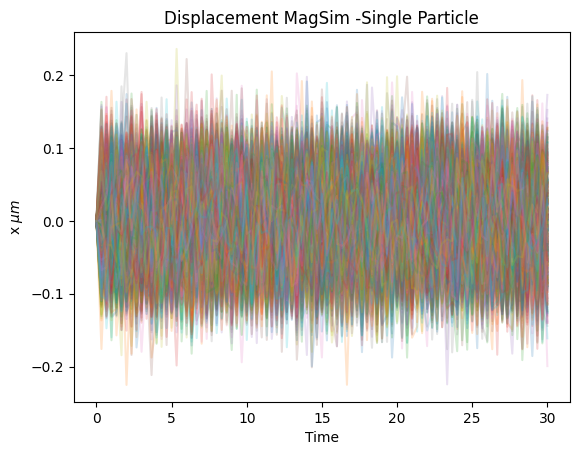

In [61]:
for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    
    plt.plot(time_array, x_part, alpha=0.2)

plt.title("Displacement MagSim -" + key_name)
plt.xlabel("Time")
plt.ylabel(r"x $\mu{}m$")
plt.show()

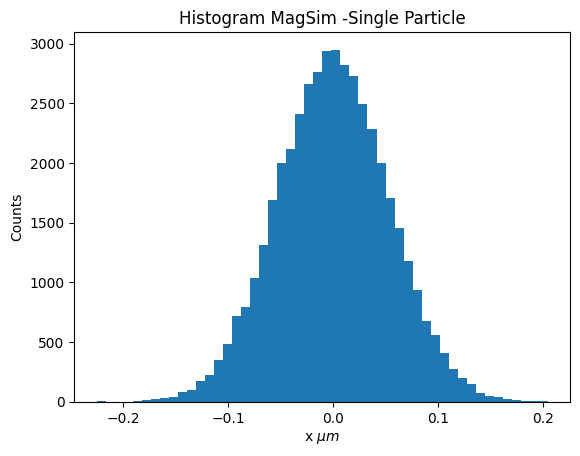

In [62]:
# Range for the histogram data
t_i_idx = np.argmin(np.abs(time_array - t_i))
n_per_run = len(time_array[t_i_idx:-1])
x_fin = np.zeros(tot_runs*n_per_run)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_fin[n_per_run*i:(n_per_run*(i+1))] = x_part[t_i_idx:-1]


plt.hist(x_fin, bins=50)
plt.title("Histogram MagSim -" + key_name)
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.show()

Get the histogram of the particle with interactions

In [63]:
direction_results = r"./results/" + "results_1000_trap.csv"
key_name_2 = "Interaction"
data_2 = pd.read_csv(direction_results)

In [64]:
tot_runs_2 = max(data_2["run_number"])
tot_frames_2 = len(data_2["frame"].tolist())/tot_runs_2
time_per_frame_2 = tot_time / tot_frames_2
time_array_2 = np.linspace(0, int(tot_time), int(tot_frames_2))

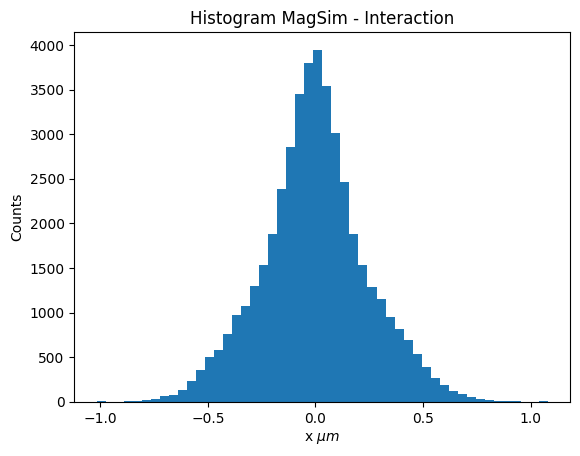

In [65]:
# Second Histogram
t_i_idx = np.argmin(np.abs(time_array_2 - t_i))
n_per_run = len(time_array_2[t_i_idx:-1])
x_fin_2 = np.zeros(tot_runs_2*n_per_run)

for i in range(tot_runs_2):
    part = data_2[data_2["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_fin_2[n_per_run*i:(n_per_run*(i+1))] = x_part[t_i_idx:-1]


plt.hist(x_fin_2, bins=50)
plt.title("Histogram MagSim - " + key_name_2)
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.show()

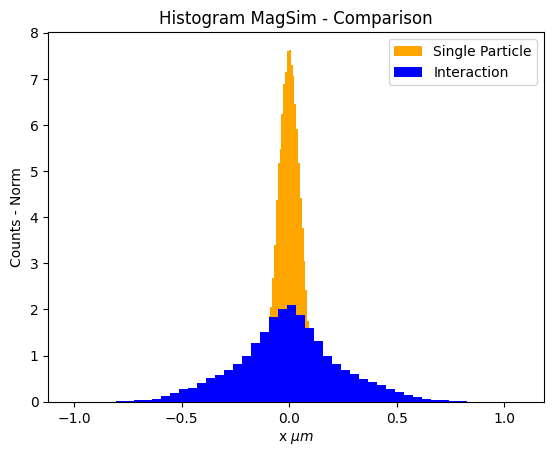

In [66]:
# Comparison of histograms
plt.hist(x_fin, bins=50, color="orange", label=key_name, density=True)
plt.hist(x_fin_2, bins=50, color="blue", label=key_name_2, density=True)
plt.title("Histogram MagSim - Comparison")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts - Norm")
plt.legend()
plt.show()

Test to convert into vectors -  As if its our probability distribution

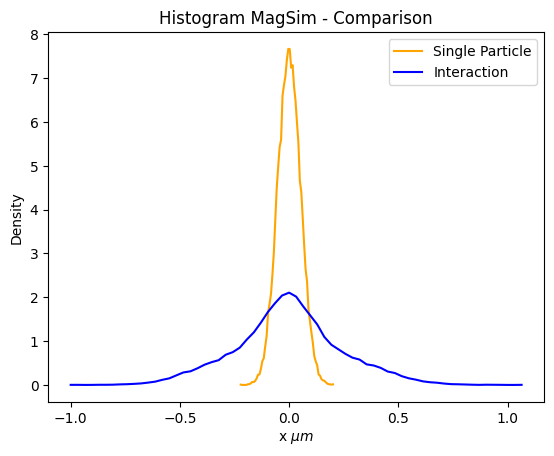

In [67]:
# Get Histogram Data as Vectors
counts_1, bin_edges_1 = np.histogram(x_fin, bins=65, density=True)
counts_2, bin_edges_2 = np.histogram(x_fin_2, bins=65, density=True)
# Get the center of each bin, ie, "x"
bin_centers_1 = 0.5 * (bin_edges_1[1:] + bin_edges_1[:-1])
bin_centers_2 = 0.5 * (bin_edges_2[1:] + bin_edges_2[:-1])


plt.plot(bin_centers_1, counts_1, label=key_name, color='orange')
plt.plot(bin_centers_2, counts_2, label=key_name_2, color='blue')
plt.title("Histogram MagSim - Comparison")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Density")
plt.legend()
plt.show()

In [68]:
# Check probability
sum(counts_1)*(bin_centers_1[1]-bin_centers_1[0])

0.9999999999999998

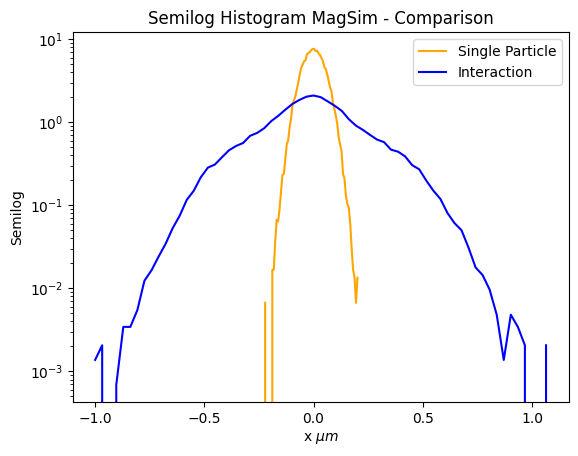

In [69]:
plt.semilogy(bin_centers_1, counts_1, label=key_name, color='orange')
plt.semilogy(bin_centers_2, counts_2, label=key_name_2, color='blue')
plt.title("Semilog Histogram MagSim - Comparison")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Semilog")
plt.legend()
plt.show()

We want to see the "deviation" from the normal distribution the histogram/positions should take, therefore we do a fit and observe this.

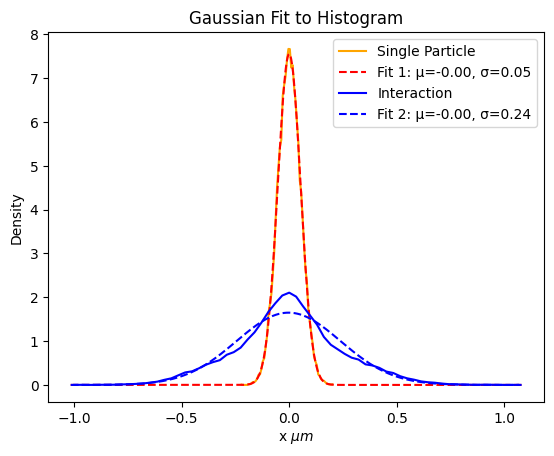

In [70]:
from scipy.stats import norm

# Gaussian Fits
mu_1, std_1 = norm.fit(x_fin)
mu_2, std_2 = norm.fit(x_fin_2)

# Create x values for the PDF curve
n_pdf = 500
x_vals = np.linspace(min(np.min(x_fin), np.min(x_fin_2)),
                     max(np.max(x_fin), np.max(x_fin_2)), n_pdf)

# Get vector of Gaussian Fits
pdf_1 = norm.pdf(x_vals, mu_1, std_1)
pdf_2 = norm.pdf(x_vals, mu_2, std_2)

plt.plot(bin_centers_1, counts_1, label=key_name, color='orange')
plt.plot(x_vals, pdf_1, 'r--', label=f"Fit 1: μ={mu_1:.2f}, σ={std_1:.2f}")

plt.plot(bin_centers_2, counts_2, label=key_name_2, color='blue')
plt.plot(x_vals, pdf_2, 'b--', label=f"Fit 2: μ={mu_2:.2f}, σ={std_2:.2f}")

plt.xlabel(r"x $\mu{}m$")
plt.ylabel("Density")
plt.title("Gaussian Fit to Histogram")
plt.legend()
plt.show()

We then compare the semilog scales

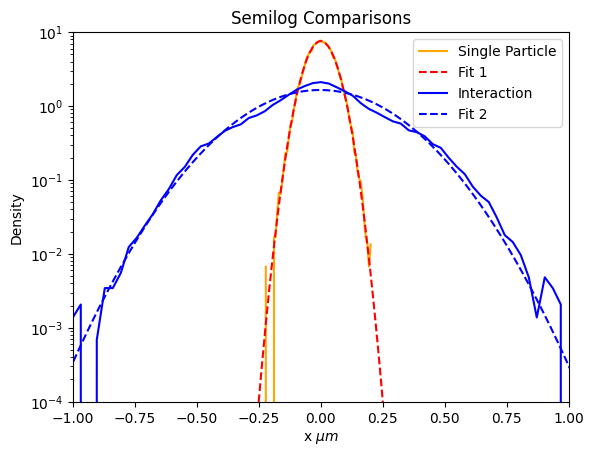

In [71]:
plt.semilogy(bin_centers_1, counts_1, label=key_name, color='orange')
plt.semilogy(x_vals, pdf_1, 'r--', label="Fit 1")

plt.semilogy(bin_centers_2, counts_2, label=key_name_2, color='blue')
plt.semilogy(x_vals, pdf_2, 'b--', label="Fit 2")

plt.xlabel(r"x $\mu{}m$")
plt.ylabel("Density")
plt.title("Semilog Comparisons")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([1e-4, 1e1])
plt.show()